Instalacja starszej ersji Tensorflow

In [ ]:
!pip install tensorflowjs
!pip install TensorFlow==2.15.0
!pip install tensorflow-decision-forests==1.8.1

Import bibliotek

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

Dane treningowe

In [ ]:
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train_or = np.array([[0], [1], [1], [1]])
y_train_and = np.array([[0], [0], [0], [1]])
y_train_xor = np.array([[0], [1], [1], [0]])

Wybór danych treningowych

In [ ]:
y_train = y_train_or
# y_train = y_train_and
# y_train = y_train_xor

In [ ]:
constant_initializer = tf.keras.initializers.Constant(value=0.1)
random_initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
default_initializer = tf.keras.initializers.GlorotUniform()

kernel_initializer = random_initializer

Model nr 1

In [ ]:
model = tf.keras.Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(1, activation='sigmoid', kernel_initializer=kernel_initializer))

Model nr 2

In [ ]:
model = tf.keras.Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(4, activation='sigmoid', kernel_initializer=kernel_initializer))
model.add(Dense(1, activation='sigmoid', kernel_initializer=kernel_initializer))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=500, verbose=0, callbacks=early_stopping)
model.summary()
print("Test danych treningowych\n", model.predict(X_train))

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Test danych treningowych
 [[0.19269642]
 [0.88530344]
 [0.9556346 ]
 [0.9985664 ]]


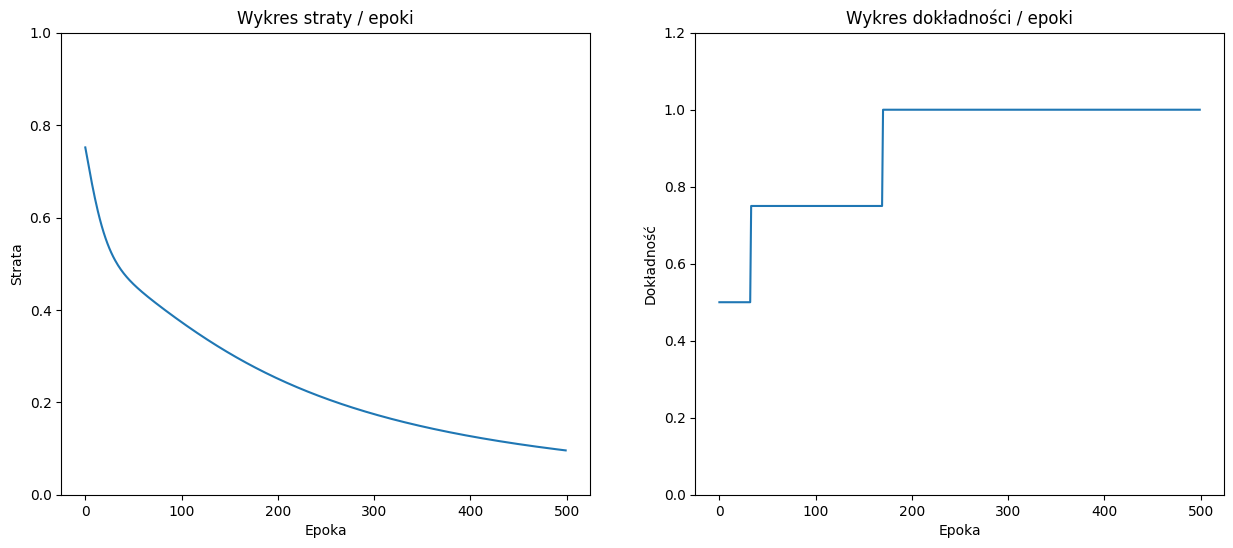

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(history.history['loss'])
axs[0].set_title('Wykres straty / epoki')
axs[0].set_xlabel('Epoka')
axs[0].set_ylabel('Strata')
axs[0].set_ylim([0, 1])

axs[1].plot(history.history['accuracy'])
axs[1].set_title('Wykres dokładności / epoki')
axs[1].set_xlabel('Epoka')
axs[1].set_ylabel('Dokładność')
axs[1].set_ylim([0, 1.2])

plt.show()

Zapis modelu do Tensorflow.js

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'model')